1. gap between sepsis and AKI 
2. sofa in sepsis and AKI onset
3. mbp, lactate in sepsis and AKI onset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(19680804)
import datetime as dt
# test： t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, 
# Levene, Wilcoxon, Kruskal, Brunner-Munzel.

#  gap between sepsis and AKI 

In [ ]:
df_time_all = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/04.other_feature_in_three_dataset/04.survival_treatment/df_time_all.csv")
select_dataset = "aumcdb"

def plot_box1(select_dataset):
    import seaborn as sns
    df_time = df_time_all[df_time_all["dataset"]==select_dataset]
    tit = df_time.dataset.unique()[0]
    df_time = df_time[["stay_id","los_saki-sepsis","groupHPD"]]
    fig = plt.figure(figsize=(4,3))
    ax = sns.boxplot(x="groupHPD",y="los_saki-sepsis", data=df_time,palette="Set3", showfliers=False,showmeans=True,
                meanprops = {'marker':'D','markerfacecolor':'white'},whis=0.5)
    data_p = df_time


    from statannotations.Annotator import Annotator
    box_pairs = [(1,2),(1,3),(2,3)]
    annotator =  Annotator(ax, data=data_p, x="groupHPD",y="los_saki-sepsis",
                          pairs=box_pairs)
    annotator.configure(test='t-test_welch', text_format='star',line_height=0.03,line_width=1,loc='outside') #t-test_ind， Mann-Whitney Wilcoxon
    annotator.apply_and_annotate()
    plt.title(tit,x=-0.2,y=1)
    plt.show()
# select_dataset = "mimic"
# plot_box1(select_dataset)
# select_dataset = "aumcdb"
# plot_box1(select_dataset)
# select_dataset = "eicu"
# plot_box1(select_dataset)

# feature in sepsis and AKI onset

In [3]:
df_type_filt1 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/01.MIMICIV_SAKI_trajCluster//df_mixAK_fea4_C3.csv")
df_type_filt1 = df_type_filt1[["stay_id","groupHPD"]].drop_duplicates()
df_t1 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_mimic/disease_definition/AKI/sk_event_time.csv")
df_t1 = df_t1[["stay_id","sepsis_onset", "saki_onset"]]
df_t1 = pd.merge(df_type_filt1, df_t1, how="inner", on="stay_id")

df_type_filt2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2//02.AUMCdb_SAKI_trajCluster/df_mixAK_fea3_C3_aumc.csv")
df_type_filt2 = df_type_filt2[["stay_id","groupHPD"]].drop_duplicates()
df_t2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_aumc/disease_definition/AKI/aumcdb_sk_event_time.csv")
df_t2 = df_t2[["stay_id","sepsis_onset", "saki_onset"]]
df_t2 = pd.merge(df_type_filt2, df_t2, how="inner", on="stay_id")

df_type_filt3 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2//03.eICU_SAKI_trajCluster/df_mixAK_fea4_C3_eicu.csv")
df_type_filt3 = df_type_filt3[["stay_id","groupHPD"]].drop_duplicates()
df_t3 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_eicu/disease_definition/AKI/eicu_saki_event_time.csv")
df_t3 = df_t3[["stay_id","sepsis_onset", "saki_onset"]]
df_t3 = pd.merge(df_type_filt3, df_t3, how="inner", on="stay_id")


In [4]:
def fea_boxplot2(df_start,df_end,tit):
    import seaborn as sns
    from statannot import add_stat_annotation
    from statannotations.Annotator import Annotator
    df_start["status"] = "Sepsis"
    df_end["status"] = "S-AKI"
    data_p = pd.concat([df_start, df_end], axis=0)
    map_dict ={1:"C1",2:"C2",3:"C3"}
    data_p["groupHPD"] = data_p["groupHPD"].map(map_dict)
    fig = plt.figure(figsize=(4,3))
    ax= sns.boxplot(x="groupHPD",y=fea,hue="status",
                    showfliers=False,showmeans=True,
                    data=data_p,order=["C1","C2","C3"],palette='Set2',saturation=0.4)
    add_stat_annotation(ax,data=data_p,x="groupHPD",y=fea,hue="status",order=["C1","C2","C3"],test="t-test_welch",box_pairs=[(("C2","Sepsis"),("C2","S-AKI")),(("C1","Sepsis"),("C1","S-AKI")),(("C3","Sepsis"),("C3","S-AKI"))],loc='outside')
    plt.legend(loc='upper right') #Mann-Whitney
    plt.title(tit,x=-0.2,y=1)
    plt.show()

## mbp,lactate in sepsis and AKI onset

In [5]:
sepsis_start_cut_t = -12
sepsis_end_cut_t = 0
saki_start_cut_t = 0
saki_end_cut_t = 12


### mimic

In [6]:
# df_mimic = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_mimic/feature_data/sk_icu_feature.csv")
# df_mimic = df_mimic[['stay_id', 'charttime','mbp','urineoutput','lactate','creatinine']]
# df_mimic = pd.merge(df_mimic, df_t1, how="inner", on="stay_id")
# df_mimic["charttime"] = pd.to_datetime(df_mimic["charttime"])
# df_mimic = df_mimic.sort_values('charttime')
# df_mimic["sepsis_onset"] = pd.to_datetime(df_mimic["sepsis_onset"])
# df_mimic["saki_onset"] = pd.to_datetime(df_mimic["saki_onset"])
# df_mimic["sepsis_time"] = (df_mimic["charttime"] - df_mimic["sepsis_onset"]).map(lambda x:x/np.timedelta64(1, 'h')).tolist()
# df_mimic["saki_time"] = (df_mimic["charttime"] - df_mimic["saki_onset"]).map(lambda x:x/np.timedelta64(1, 'h')).tolist()
# df_mimic["stay_id_copy"] = df_mimic["stay_id"]
# df_mimic = df_mimic.groupby('stay_id_copy').fillna(method='ffill')#.fillna(method='bfill')

# df_mimic_seps = df_mimic[(df_mimic["sepsis_time"] <=sepsis_end_cut_t) &(df_mimic["sepsis_time"] >= sepsis_start_cut_t)]
# df_mimic_saki = df_mimic[(df_mimic["saki_time"] <=saki_end_cut_t) &(df_mimic["saki_time"] >= saki_start_cut_t)]
# df_mimic_saki = df_mimic_saki.groupby(["stay_id","groupHPD"]).agg({'mbp':"mean",'urineoutput':"mean",'lactate':"mean",'creatinine':"mean"}).reset_index()
# df_mimic_seps = df_mimic_seps.groupby(["stay_id","groupHPD"]).agg({'mbp':"mean",'urineoutput':"mean",'lactate':"mean",'creatinine':"mean"}).reset_index()
# df_mimic_saki.isna().sum()/df_t1.shape[0], df_mimic_seps.isna().sum()/df_t1.shape[0]

In [7]:
# import math
# fea_lst = ['mbp','urineoutput','lactate','creatinine']
# df_start = df_mimic_seps
# df_end = df_mimic_saki
# for fea in fea_lst:
#     fix_feature = ['stay_id', 'groupHPD']
#     fix_feature.append(fea)
#     df_start_ = df_start[fix_feature].dropna(how='all', subset=[fea])
#     df_end_ = df_end[fix_feature].dropna(how='all', subset=[fea])
#     fea_boxplot2(df_start_,df_end_,"MIMIC")

### aumc

In [8]:
# df_aumc = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_aumc/feature_data/aumc_icu_feature.csv")
# df_aumc = df_aumc[['stay_id', 'charttime','mbp','urineoutput','lactate','creatinine']]
# df_aumc = pd.merge(df_aumc, df_t2, how="inner", on="stay_id")
# df_aumc = df_aumc.sort_values('charttime')
# df_aumc["sepsis_time"] = (df_aumc["charttime"] - df_aumc["sepsis_onset"])/1
# df_aumc["saki_time"] = (df_aumc["charttime"] - df_aumc["saki_onset"])/1
# df_aumc["stay_id_copy"] = df_aumc["stay_id"]
# df_aumc = df_aumc.groupby('stay_id_copy').fillna(method='ffill')#.fillna(method='bfill')


# df_aumc_seps = df_aumc[(df_aumc["sepsis_time"] <= sepsis_end_cut_t) &(df_aumc["sepsis_time"] >= sepsis_start_cut_t)]
# df_aumc_saki = df_aumc[(df_aumc["saki_time"] <= saki_end_cut_t) &(df_aumc["saki_time"] >= saki_start_cut_t)]
# df_aumc_saki = df_aumc_saki.groupby(["stay_id","groupHPD"]).agg({'mbp':"mean",'urineoutput':"mean",'lactate':"mean",'creatinine':"mean"}).reset_index()
# df_aumc_seps = df_aumc_seps.groupby(["stay_id","groupHPD"]).agg({'mbp':"mean",'urineoutput':"mean",'lactate':"mean",'creatinine':"mean"}).reset_index()
# df_aumc_saki.isna().sum()/df_aumc_saki.shape[0], df_aumc_seps.isna().sum()/df_aumc_seps.shape[0]

In [9]:
# import math
# fea_lst = ['mbp','lactate','urineoutput','creatinine']
# df_start = df_aumc_seps
# df_end = df_aumc_saki
# # for fea in fea_lst:
# #     fea_boxplot2(df_start,df_end,"AUMCdb")
# for fea in fea_lst:
#     fix_feature = ['stay_id', 'groupHPD']
#     fix_feature.append(fea)
#     df_start_ = df_start[fix_feature].dropna(how='all', subset=[fea])
#     df_end_ = df_end[fix_feature].dropna(how='all', subset=[fea])
#     fea_boxplot2(df_start_,df_end_,"AUMCdb")

### eicu 

In [10]:
# df_eicu = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_eicu/feature_data/eicu_data_merge.csv")
# df_eicu = df_eicu[['stay_id', 'charttime','mbp','urineoutput','lactate','creatinine']]
# df_eicu = pd.merge(df_eicu, df_t3, how="inner", on="stay_id")
# df_eicu["sepsis_time"] = (df_eicu["charttime"] - df_eicu["sepsis_onset"])/1
# df_eicu["saki_time"] = ( df_eicu["charttime"] - df_eicu["saki_onset"] )/1
# df_eicu["stay_id_copy"] = df_eicu["stay_id"]
# df_eicu = df_eicu.groupby('stay_id_copy').fillna(method='ffill')#.fillna(method='bfill')

# df_eicu_seps = df_eicu[(df_eicu["sepsis_time"] <=sepsis_end_cut_t) &(df_eicu["sepsis_time"] >= sepsis_start_cut_t)]
# df_eicu_saki = df_eicu[(df_eicu["saki_time"] <=saki_end_cut_t) &(df_eicu["saki_time"] >= saki_start_cut_t)]
# df_eicu_saki = df_eicu_saki.groupby(["stay_id","groupHPD"]).agg({'mbp':"mean",'urineoutput':"mean",'lactate':"mean",'creatinine':"mean"}).reset_index()
# df_eicu_seps = df_eicu_seps.groupby(["stay_id","groupHPD"]).agg({'mbp':"mean",'urineoutput':"mean",'lactate':"mean",'creatinine':"mean"}).reset_index()
# df_eicu_saki.isna().sum()/df_t3.shape[0], df_eicu_seps.isna().sum()/df_t3.shape[0]

In [11]:
# import math
# fea_lst = ['mbp','urineoutput','lactate','creatinine']
# df_start = df_eicu_seps
# df_end = df_eicu_saki
# # for fea in fea_lst:
# #     fea_boxplot2(df_start,df_end,"eICU")
# for fea in fea_lst:
#     fix_feature = ['stay_id', 'groupHPD']
#     fix_feature.append(fea)
#     df_start_ = df_start[fix_feature].dropna(how='all', subset=[fea])
#     df_end_ = df_end[fix_feature].dropna(how='all', subset=[fea])
#     fea_boxplot2(df_start_,df_end_,"eICU")

## sofa in sepsis and AKI onset

### mimic

In [12]:
df = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/04.other_feature_in_three_dataset/03.sofa_feature/mimic_sofa.csv")
df = pd.merge(df,df_t1, how="inner",on="stay_id") 
df["starttime"] = pd.to_datetime(df["starttime"], format='%d/%m/%Y %H:%M:%S')
df["charttime"] = df.starttime + dt.timedelta(hours=0.5)
df = df.sort_values(["stay_id","charttime"])
df = df[['stay_id','groupHPD', 'charttime', 'respiration_24hours', 'coagulation_24hours', 'liver_24hours',
       'cardiovascular_24hours', 'cns_24hours', 'renal_24hours','sofa_24hours','sepsis_onset', 'saki_onset']]
df = df.rename(columns={'respiration_24hours':"respiration_sofa", 'coagulation_24hours':"coagulation_sofa", 'liver_24hours': 'liver_sofa',
       'cardiovascular_24hours':"cardiovascular_sofa", 'cns_24hours':'cns_sofa', 'renal_24hours':'renal_sofa','sofa_24hours':"sofa"})

df["sepsis_onset"] = pd.to_datetime(df["sepsis_onset"])
df["saki_onset"] = pd.to_datetime(df["saki_onset"])
df["sepsis_time"] = (df["charttime"] - df["sepsis_onset"]).map(lambda x:x/np.timedelta64(1, 'h')).tolist()
df["saki_time"] = (df["charttime"] - df["saki_onset"]).map(lambda x:x/np.timedelta64(1, 'h')).tolist()
df["stay_id_copy"] = df["stay_id"]
df = df.groupby('stay_id_copy').fillna(method='ffill')#.fillna(method='bfill')
df["sofa"] = df["respiration_sofa"] + df["coagulation_sofa"] + df["liver_sofa"] + df["cardiovascular_sofa"] + df["cns_sofa"] + df["renal_sofa"] 
df["sofa_norenal"] = df["respiration_sofa"] + df["coagulation_sofa"] + df["liver_sofa"] + df["cardiovascular_sofa"] + df["cns_sofa"]  
df_mimic_sofa = df

df_mimic_sofa_seps = df_mimic_sofa[(df_mimic_sofa["sepsis_time"] <=sepsis_end_cut_t) &(df_mimic_sofa["sepsis_time"] >= sepsis_start_cut_t)]
df_mimic_sofa_saki = df_mimic_sofa[(df_mimic_sofa["saki_time"] <=saki_end_cut_t) &(df_mimic_sofa["saki_time"] >= saki_start_cut_t)]
df_mimic_sofa_saki = df_mimic_sofa_saki.groupby(["stay_id","groupHPD"]).agg({'respiration_sofa':"mean", 'coagulation_sofa':"mean",'liver_sofa':"mean", 'cardiovascular_sofa':"mean",
                'cns_sofa':"mean", 'renal_sofa':"mean","sofa":"mean","sofa_norenal":"mean"}).reset_index()
df_mimic_sofa_seps = df_mimic_sofa_seps.groupby(["stay_id","groupHPD"]).agg({'respiration_sofa':"mean", 'coagulation_sofa':"mean",'liver_sofa':"mean", 'cardiovascular_sofa':"mean",
                'cns_sofa':"mean", 'renal_sofa':"mean","sofa":"mean","sofa_norenal":"mean"}).reset_index()
df_mimic_sofa_seps.isna().sum()/df_t1.shape[0], df_mimic_sofa_saki.isna().sum()/df_t1.shape[0]

(stay_id                0.0
 groupHPD               0.0
 respiration_sofa       0.0
 coagulation_sofa       0.0
 liver_sofa             0.0
 cardiovascular_sofa    0.0
 cns_sofa               0.0
 renal_sofa             0.0
 sofa                   0.0
 sofa_norenal           0.0
 dtype: float64,
 stay_id                0.0
 groupHPD               0.0
 respiration_sofa       0.0
 coagulation_sofa       0.0
 liver_sofa             0.0
 cardiovascular_sofa    0.0
 cns_sofa               0.0
 renal_sofa             0.0
 sofa                   0.0
 sofa_norenal           0.0
 dtype: float64)

In [13]:
# import math
# fea_lst = ['respiration_sofa', 'coagulation_sofa', 'liver_sofa','cardiovascular_sofa', 'cns_sofa', 'renal_sofa',"sofa","sofa_norenal"]
# df_start = df_mimic_sofa_seps
# df_end = df_mimic_sofa_saki

# for fea in fea_lst:
#     fix_feature = ['stay_id', 'groupHPD']
#     fix_feature.append(fea)
#     df_start_ = df_start[fix_feature].dropna(how='all', subset=[fea])
#     df_end_ = df_end[fix_feature].dropna(how='all', subset=[fea])
#     fea_boxplot2(df_start_,df_end_,"MIMIC")

In [14]:
sub_sofa_lst = ['respiration_sofa', 'coagulation_sofa', 'liver_sofa',
       'cardiovascular_sofa', 'cns_sofa', 'renal_sofa']
total_sofa_lst = ['sofa','sofa_norenal']

df_start = df_mimic_sofa_seps
df_end = df_mimic_sofa_saki

df_start_ = df_start
df_start_ = df_start_.set_index(["stay_id","groupHPD"])
df_start_ = df_start_.stack().reset_index()
df_start_.columns = ["stay_id","groupHPD","sub_sofa","value"]
df_start_["label"] = df_start_["sub_sofa"] +"_"+ df_start_["groupHPD"].map(str)

df_end_ = df_end
df_end_ = df_end_.set_index(["stay_id","groupHPD"])
df_end_ = df_end_.stack().reset_index()
df_end_.columns = ["stay_id","groupHPD","sub_sofa","value"]
df_end_["label"] = df_end_["sub_sofa"] +"_"+ df_end_["groupHPD"].map(str)

['cardiovascular_sofa_1', 'cardiovascular_sofa_2', 'cardiovascular_sofa_3', 'cns_sofa_1', 'cns_sofa_2', 'cns_sofa_3', 'coagulation_sofa_1', 'coagulation_sofa_2', 'coagulation_sofa_3', 'liver_sofa_1', 'liver_sofa_2', 'liver_sofa_3', 'renal_sofa_1', 'renal_sofa_2', 'renal_sofa_3', 'respiration_sofa_1', 'respiration_sofa_2', 'respiration_sofa_3']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

liver_sofa_1_Sepsis v.s. liver_sofa_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.456e-06 stat=-5.381e+00
liver_sofa_2_Sepsis v.s. liver_sofa_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.834e-11 stat=-7.144e+00
liver_sofa_3_Sepsis v.s. liver_sofa_3_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=7.646e-05 stat=-4.636e+00
renal_sofa_1_Sepsis v.s. renal_sofa_1_SA-AKI: Welch's t-test indepe

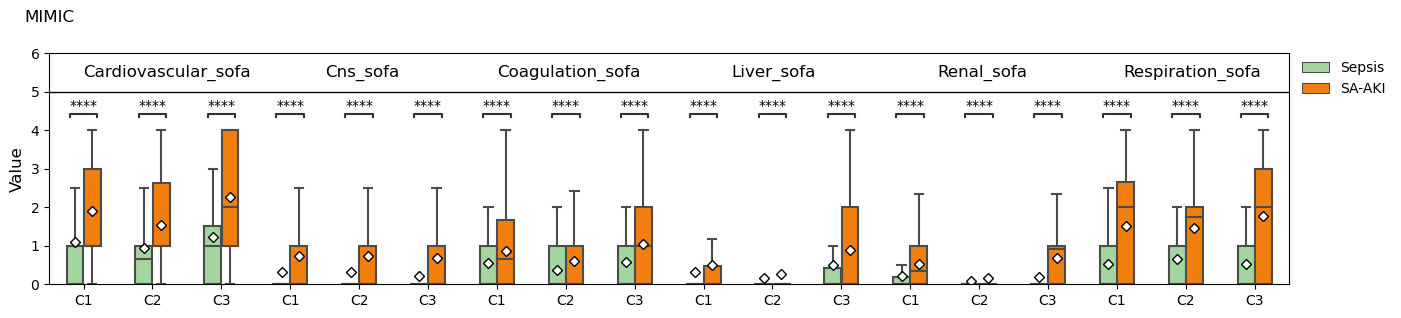

In [15]:
def fea_boxplot3(df_start,df_end,tit,select_lst):
    import seaborn as sns
    from statannot import add_stat_annotation
    from statannotations.Annotator import Annotator
    df_start["status"] = "Sepsis"
    df_end["status"] = "SA-AKI"
    data_p = pd.concat([df_start, df_end], axis=0)
    data_p = data_p[data_p["sub_sofa"].isin(select_lst)]
    data_p = data_p.sort_values(["sub_sofa","groupHPD"])
    tit_lst = data_p.label.unique().tolist()
    print(tit_lst)
    box_pairs = []
    for i in ['cardiovascular_sofa_1', 'cardiovascular_sofa_2', 'cardiovascular_sofa_3', 'cns_sofa_1', 'cns_sofa_2', 'cns_sofa_3', 'coagulation_sofa_1', 'coagulation_sofa_2', 'coagulation_sofa_3', 'liver_sofa_1', 'liver_sofa_2', 'liver_sofa_3', 'renal_sofa_1', 'renal_sofa_2', 'renal_sofa_3', 'respiration_sofa_1', 'respiration_sofa_2', 'respiration_sofa_3']:
        j = ((i, "Sepsis"), (i, "SA-AKI"))
        box_pairs.append(j)
    size=12
    map_dict ={1:"C1",2:"C2",3:"C3"}
    data_p["groupHPD"] = data_p["groupHPD"].map(map_dict)
    fig = plt.figure(figsize=(16,3))
    ax = sns.boxplot(x="label",y="value",hue="status",
                    showfliers=False,showmeans=True,
                    data=data_p,palette=["#a1d99b","#ff7f00"],saturation=0.9,width=0.5,meanprops = {'markersize':5,'marker':'D', 'markerfacecolor':'white','markeredgecolor':'black'}) #order=["C1","C2","C3"]

#    positions = [x for x in range(1, len(select_lst) * 8) if x % 4 != 0] #[x for x in range(1, len(select_lst) * 5) if x % 5 != 0]  # Define the desired positions
    
    add_stat_annotation(ax,data=data_p,x="label",y="value",hue="status",order=tit_lst,test="t-test_welch",box_pairs=box_pairs,loc='outside')
    plt.legend(bbox_to_anchor=(1,1.02),frameon=False) #Mann-Whitney
    plt.title(tit,x=0,y=1.1)
#    plt.xticks([x for x in range(1, len(select_lst) * 4) if x % 4 != 0],["C1","C2","C3"]*len(select_lst))
    plt.xticks(list(range(0,len(select_lst)*3)),["C1","C2","C3"]*len(select_lst))
#    plt.xticks(rotation=90) #list(range(1,len(select_lst)*3+1)),  [x for x in range(1, len(select_lst)*4) if x % 4 != 0],
    plt.ylim(0,6)
    plt.xlabel("")
    plt.ylabel("Value",fontsize=size)
    plt.axhline(y=5, color='black', linestyle='-',lw=1)
    
    tit_lst = data_p.sub_sofa.unique().tolist()
    tit_lst = [word.capitalize() for word in tit_lst]
    plt.text(0,5.4,tit_lst[0],fontsize=size)
    plt.text(3.5,5.4,tit_lst[1],fontsize=size)
    plt.text(6,5.4,tit_lst[2],fontsize=size)
    plt.text(9.4,5.4,tit_lst[3],fontsize=size)
    plt.text(12.4,5.4,tit_lst[4],fontsize=size)
    plt.text(15.1,5.4,tit_lst[5],fontsize=size)
    plt.show()
    
fea_boxplot3(df_start_,df_end_,"MIMIC",sub_sofa_lst)

['sofa_1', 'sofa_2', 'sofa_3', 'sofa_norenal_1', 'sofa_norenal_2', 'sofa_norenal_3']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sofa_2_Sepsis v.s. sofa_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.242e+01
sofa_1_Sepsis v.s. sofa_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=2.470e-172 stat=-3.056e+01
sofa_3_Sepsis v.s. sofa_3_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=7.161e-71 stat=-2.038e+01
sofa_norenal_1_Sepsis v.s. sofa_norenal_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.610e-150 stat=-2.823e+01
sofa_norenal_2_Sepsis v.s. sofa_norenal_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.215e+01
sofa_norenal_3_Sepsis v.s. sofa_norenal_3_SA-AKI: Welch's t-test indepen

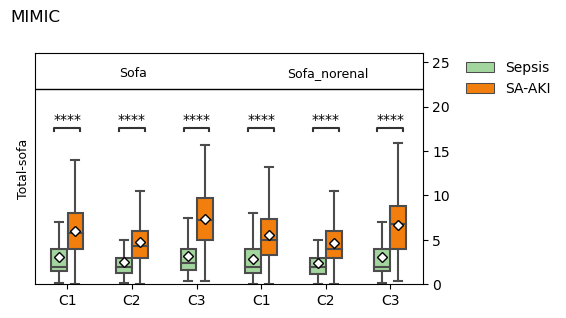

In [16]:
def fea_boxplot3(df_start,df_end,tit,select_lst):
    import seaborn as sns
    from statannot import add_stat_annotation
    from statannotations.Annotator import Annotator
    df_start["status"] = "Sepsis"
    df_end["status"] = "SA-AKI"
    data_p = pd.concat([df_start, df_end], axis=0)
    data_p = data_p[data_p["sub_sofa"].isin(select_lst)]
    data_p = data_p.sort_values(["sub_sofa","groupHPD"])
    tit_lst = data_p.label.unique().tolist()
    print(tit_lst)
    box_pairs = []
    for i in tit_lst:
        j = ((i, "Sepsis"), (i, "SA-AKI"))
        box_pairs.append(j)
    size=9
    map_dict ={1:"C1",2:"C2",3:"C3"}
    data_p["groupHPD"] = data_p["groupHPD"].map(map_dict)
    fig = plt.figure(figsize=(5,3))
    
    ax = sns.boxplot(x="label",y="value",hue="status",
                    showfliers=False,showmeans=True,meanprops = {'markersize':5,'marker':'D', 'markerfacecolor':'white','markeredgecolor':'black'},
                    data=data_p,palette=["#a1d99b","#ff7f00"],saturation=0.9,width=0.5) #order=["C1","C2","C3"]
    ax.yaxis.tick_right()
    add_stat_annotation(ax,data=data_p,x="label",y="value",hue="status",order=tit_lst,test="t-test_welch",box_pairs=box_pairs,loc='outside')
    plt.legend(bbox_to_anchor=(1.08,1.02),frameon=False) #Mann-Whitney
    plt.title(tit,x=0,y=1.1)
    plt.xticks(list(range(0,len(select_lst)*3)),["C1","C2","C3"]*len(select_lst))
    plt.ylim(0,26)
    plt.xlabel("")
    plt.ylabel("")
    plt.ylabel("Total-sofa",fontsize=size)
    plt.axhline(y=22, color='black', linestyle='-',lw=1)
    
    tit_lst = data_p.sub_sofa.unique().tolist()
    tit_lst = [word.capitalize() for word in tit_lst]
    plt.text(0.8,23.3,tit_lst[0],fontsize=size)
    plt.text(3.4,23.3,tit_lst[1],fontsize=size)
    plt.show()
    
fea_boxplot3(df_start_,df_end_,"MIMIC",total_sofa_lst)

### aumcdb

In [17]:
df = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/04.other_feature_in_three_dataset/03.sofa_feature/aumcdb_sofa.csv") # hour
df = df.rename(columns={'admissionid':'stay_id','time':'charttime','sofa_respiration_score':"respiration_sofa", 'sofa_coagulation_score':"coagulation_sofa", 'sofa_liver_score': 'liver_sofa',
        'sofa_cardiovascular_score':"cardiovascular_sofa", 'sofa_cns_score':'cns_sofa', 'sofa_renal_score':'renal_sofa','sofa_total_score':"sofa"})
df = pd.merge(df,df_t2, how="inner",on="stay_id") #df[df["stay_id"].isin(all_lst)]
df = df.sort_values(["stay_id","charttime"])
df["sepsis_time"] = (df["charttime"] - df["sepsis_onset"] )/1
df["saki_time"] = (df["charttime"] - df["saki_onset"] )/1
df["stay_id_copy"] = df["stay_id"]
df = df.groupby('stay_id_copy').fillna(method='ffill')#.fillna(method='bfill')
df["sofa"] = df["respiration_sofa"] + df["coagulation_sofa"] + df["liver_sofa"] + df["cardiovascular_sofa"] + df["cns_sofa"] + df["renal_sofa"] 
df["sofa_norenal"] = df["respiration_sofa"] + df["coagulation_sofa"] + df["liver_sofa"] + df["cardiovascular_sofa"] + df["cns_sofa"]  
df_aumc_sofa = df

df_aumc_sofa_seps = df_aumc_sofa[(df_aumc_sofa["sepsis_time"] <=sepsis_end_cut_t) &(df_aumc_sofa["sepsis_time"] >= sepsis_start_cut_t)]
df_aumc_sofa_saki = df_aumc_sofa[(df_aumc_sofa["saki_time"] <=saki_end_cut_t) &(df_aumc_sofa["saki_time"] >= saki_start_cut_t)]
df_aumc_sofa_saki = df_aumc_sofa_saki.groupby(["stay_id","groupHPD"]).agg({'respiration_sofa':"mean", 'coagulation_sofa':"mean",'liver_sofa':"mean", 'cardiovascular_sofa':"mean",
                'cns_sofa':"mean", 'renal_sofa':"mean","sofa":"mean","sofa_norenal":"mean"}).reset_index()
df_aumc_sofa_seps = df_aumc_sofa_seps.groupby(["stay_id","groupHPD"]).agg({'respiration_sofa':"mean", 'coagulation_sofa':"mean",'liver_sofa':"mean", 'cardiovascular_sofa':"mean",
                'cns_sofa':"mean", 'renal_sofa':"mean","sofa":"mean","sofa_norenal":"mean"}).reset_index()

df_aumc_sofa_seps.isna().sum()/df_t2.shape[0], df_aumc_sofa_saki.isna().sum()/df_t2.shape[0]

(stay_id                0.000000
 groupHPD               0.000000
 respiration_sofa       0.326615
 coagulation_sofa       0.052222
 liver_sofa             0.431516
 cardiovascular_sofa    0.133303
 cns_sofa               0.707742
 renal_sofa             0.007787
 sofa                   0.852038
 sofa_norenal           0.852038
 dtype: float64,
 stay_id                0.000000
 groupHPD               0.000000
 respiration_sofa       0.029317
 coagulation_sofa       0.004123
 liver_sofa             0.207055
 cardiovascular_sofa    0.013743
 cns_sofa               0.445259
 renal_sofa             0.000000
 sofa                   0.535502
 sofa_norenal           0.535502
 dtype: float64)

In [18]:
# import math
# fea_lst = ['respiration_sofa', 'coagulation_sofa', 'liver_sofa','cardiovascular_sofa', 'cns_sofa', 'renal_sofa',"sofa","sofa_norenal"]
# df_start = df_aumc_sofa_seps
# df_end = df_aumc_sofa_saki
# # for fea in fea_lst:
# #     fea_boxplot2(df_start,df_end,"AUMCdb")
# for fea in fea_lst:
#     fix_feature = ['stay_id', 'groupHPD']
#     fix_feature.append(fea)
#     df_start_ = df_start[fix_feature].dropna(how='all', subset=[fea])
#     df_end_ = df_end[fix_feature].dropna(how='all', subset=[fea])
#     fea_boxplot2(df_start_,df_end_,"AUMCdb")

In [19]:
sub_sofa_lst = ['respiration_sofa', 'coagulation_sofa', 'liver_sofa',
       'cardiovascular_sofa', 'cns_sofa', 'renal_sofa']
total_sofa_lst = ['sofa','sofa_norenal']

df_start = df_aumc_sofa_seps
df_end = df_aumc_sofa_saki

df_start_ = df_start
df_start_ = df_start_.set_index(["stay_id","groupHPD"])
df_start_ = df_start_.stack().reset_index()
df_start_.columns = ["stay_id","groupHPD","sub_sofa","value"]
df_start_["label"] = df_start_["sub_sofa"] +"_"+ df_start_["groupHPD"].map(str)

df_end_ = df_end
df_end_ = df_end_.set_index(["stay_id","groupHPD"])
df_end_ = df_end_.stack().reset_index()
df_end_.columns = ["stay_id","groupHPD","sub_sofa","value"]
df_end_["label"] = df_end_["sub_sofa"] +"_"+ df_end_["groupHPD"].map(str)

['cardiovascular_sofa_1', 'cardiovascular_sofa_2', 'cardiovascular_sofa_3', 'cns_sofa_1', 'cns_sofa_2', 'cns_sofa_3', 'coagulation_sofa_1', 'coagulation_sofa_2', 'coagulation_sofa_3', 'liver_sofa_1', 'liver_sofa_2', 'liver_sofa_3', 'renal_sofa_1', 'renal_sofa_2', 'renal_sofa_3', 'respiration_sofa_1', 'respiration_sofa_2', 'respiration_sofa_3']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

liver_sofa_1_Sepsis v.s. liver_sofa_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.382e+00
liver_sofa_2_Sepsis v.s. liver_sofa_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.216e+00
liver_sofa_3_Sepsis v.s. liver_sofa_3_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.153e+00
renal_sofa_1_Sepsis v.s. renal_sofa_1_SA-AKI: Welch's t-test indepe

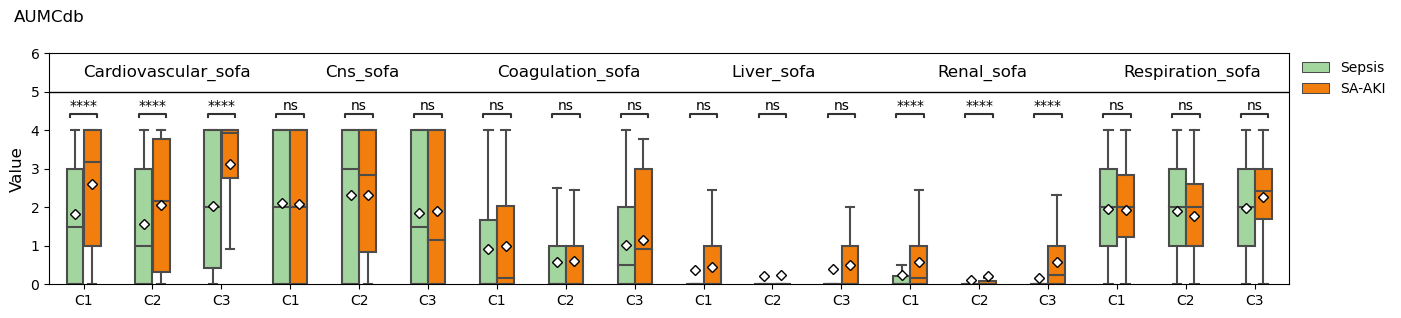

In [20]:
def fea_boxplot3(df_start,df_end,tit,select_lst):
    import seaborn as sns
    from statannot import add_stat_annotation
    from statannotations.Annotator import Annotator
    df_start["status"] = "Sepsis"
    df_end["status"] = "SA-AKI"
    data_p = pd.concat([df_start, df_end], axis=0)
    data_p = data_p[data_p["sub_sofa"].isin(select_lst)]
    data_p = data_p.sort_values(["sub_sofa","groupHPD"])
    tit_lst = data_p.label.unique().tolist()
    print(tit_lst)
    box_pairs = []
    for i in ['cardiovascular_sofa_1', 'cardiovascular_sofa_2', 'cardiovascular_sofa_3', 'cns_sofa_1', 'cns_sofa_2', 'cns_sofa_3', 'coagulation_sofa_1', 'coagulation_sofa_2', 'coagulation_sofa_3', 'liver_sofa_1', 'liver_sofa_2', 'liver_sofa_3', 'renal_sofa_1', 'renal_sofa_2', 'renal_sofa_3', 'respiration_sofa_1', 'respiration_sofa_2', 'respiration_sofa_3']:
        j = ((i, "Sepsis"), (i, "SA-AKI"))
        box_pairs.append(j)
    size=12
    map_dict ={1:"C1",2:"C2",3:"C3"}
    data_p["groupHPD"] = data_p["groupHPD"].map(map_dict)
    fig = plt.figure(figsize=(16,3))
    ax = sns.boxplot(x="label",y="value",hue="status",
                    showfliers=False,showmeans=True,meanprops = {'markersize':5,'marker':'D', 'markerfacecolor':'white','markeredgecolor':'black'},
                    data=data_p,palette=["#a1d99b","#ff7f00"],saturation=0.9,width=0.5) #order=["C1","C2","C3"]

#    positions = [x for x in range(1, len(select_lst) * 8) if x % 4 != 0] #[x for x in range(1, len(select_lst) * 5) if x % 5 != 0]  # Define the desired positions
    
    add_stat_annotation(ax,data=data_p,x="label",y="value",hue="status",order=tit_lst,test="t-test_welch",box_pairs=box_pairs,loc='outside')
    plt.legend(bbox_to_anchor=(1,1.02),frameon=False) #Mann-Whitney
    plt.title(tit,x=0,y=1.1)
#    plt.xticks([x for x in range(1, len(select_lst) * 4) if x % 4 != 0],["C1","C2","C3"]*len(select_lst))
    plt.xticks(list(range(0,len(select_lst)*3)),["C1","C2","C3"]*len(select_lst))
#    plt.xticks(rotation=90) #list(range(1,len(select_lst)*3+1)),  [x for x in range(1, len(select_lst)*4) if x % 4 != 0],
    plt.ylim(0,6)
    plt.ylabel("Value",fontsize=size)
    plt.xlabel("")
    plt.axhline(y=5, color='black', linestyle='-',lw=1)
    
    tit_lst = data_p.sub_sofa.unique().tolist()
    tit_lst = [word.capitalize() for word in tit_lst]

    plt.text(0,5.4,tit_lst[0],fontsize=size)
    plt.text(3.5,5.4,tit_lst[1],fontsize=size)
    plt.text(6,5.4,tit_lst[2],fontsize=size)
    plt.text(9.4,5.4,tit_lst[3],fontsize=size)
    plt.text(12.4,5.4,tit_lst[4],fontsize=size)
    plt.text(15.1,5.4,tit_lst[5],fontsize=size)
    plt.show()
    
fea_boxplot3(df_start_,df_end_,"AUMCdb",sub_sofa_lst)

['sofa_1', 'sofa_2', 'sofa_3', 'sofa_norenal_1', 'sofa_norenal_2', 'sofa_norenal_3']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sofa_2_Sepsis v.s. sofa_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=2.344e-05 stat=-4.679e+00
sofa_1_Sepsis v.s. sofa_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=7.324e-04 stat=-3.961e+00
sofa_3_Sepsis v.s. sofa_3_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=9.258e-04 stat=-4.179e+00
sofa_norenal_1_Sepsis v.s. sofa_norenal_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=7.889e-03 stat=-3.291e+00
sofa_norenal_2_Sepsis v.s. sofa_norenal_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=3.832e-04 stat=-4.039e+00
sofa_norenal_3_Sepsis v.s. sofa_norenal_3_SA-AKI: Welch's t-test independe

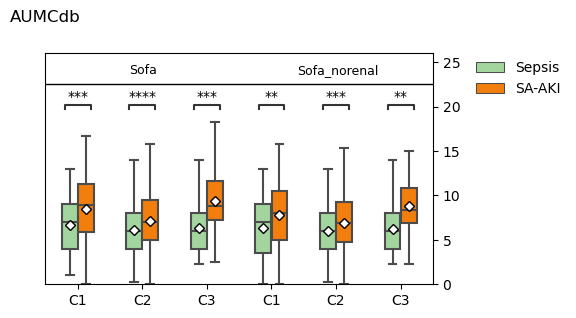

In [21]:
def fea_boxplot3(df_start,df_end,tit,select_lst):
    import seaborn as sns
    from statannot import add_stat_annotation
    from statannotations.Annotator import Annotator
    df_start["status"] = "Sepsis"
    df_end["status"] = "SA-AKI"
    data_p = pd.concat([df_start, df_end], axis=0)
    data_p = data_p[data_p["sub_sofa"].isin(select_lst)]
    data_p = data_p.sort_values(["sub_sofa","groupHPD"])
    tit_lst = data_p.label.unique().tolist()
    print(tit_lst)
    box_pairs = []
    for i in tit_lst:
        j = ((i, "Sepsis"), (i, "SA-AKI"))
        box_pairs.append(j)
    size=9
    map_dict ={1:"C1",2:"C2",3:"C3"}
    data_p["groupHPD"] = data_p["groupHPD"].map(map_dict)
    fig = plt.figure(figsize=(5,3))
    ax = sns.boxplot(x="label",y="value",hue="status",
                    showfliers=False,showmeans=True,meanprops = {'markersize':5,'marker':'D', 'markerfacecolor':'white','markeredgecolor':'black'},
                    data=data_p,palette=["#a1d99b","#ff7f00"],saturation=0.9,width=0.5) #order=["C1","C2","C3"]
    ax.yaxis.tick_right()
    add_stat_annotation(ax,data=data_p,x="label",y="value",hue="status",order=tit_lst,test="t-test_welch",box_pairs=box_pairs,loc='outside')
    plt.legend(bbox_to_anchor=(1.08,1.02),frameon=False) #Mann-Whitney
    plt.title(tit,x=0,y=1.1)
    plt.xticks(list(range(0,len(select_lst)*3)),["C1","C2","C3"]*len(select_lst))
    plt.ylim(0,26)
    plt.xlabel("")
    plt.ylabel("")
    plt.axhline(y=22.5, color='black', linestyle='-',lw=1)
    
    tit_lst = data_p.sub_sofa.unique().tolist()
    tit_lst = [word.capitalize() for word in tit_lst]
    plt.text(0.8,23.7,tit_lst[0],fontsize=size)
    plt.text(3.4,23.7,tit_lst[1],fontsize=size)
    plt.show()
    
fea_boxplot3(df_start_,df_end_,"AUMCdb",total_sofa_lst)

### eicu

In [22]:
df = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/04.other_feature_in_three_dataset/03.sofa_feature/eicu_sofa.csv") # hour
df = df.rename(columns={'patientunitstayid':'stay_id', 'hr':"charttime",'respiration_24hours':"respiration_sofa", 'coagulation_24hours':"coagulation_sofa", 'liver_24hours': 'liver_sofa',
       'cardiovascular_24hours':"cardiovascular_sofa", 'cns_24hours':'cns_sofa', 'renal_24hours':'renal_sofa','sofa_24hours':"sofa"})
df = df[['stay_id','charttime','respiration_sofa', 'coagulation_sofa', 'liver_sofa','cardiovascular_sofa', 'cns_sofa', 'renal_sofa', 'sofa']]
df["sofa"] = df["respiration_sofa"] + df["coagulation_sofa"] + df["liver_sofa"] + df["cardiovascular_sofa"] + df["cns_sofa"] + df["renal_sofa"] 

df = pd.merge(df,df_t3, how="inner",on="stay_id") 
df = df.sort_values(["stay_id","charttime"])
df["sepsis_time"] = (df["charttime"] - df["sepsis_onset"])/1
df["saki_time"] = (df["charttime"] - df["saki_onset"] )/1
df["stay_id_copy"] = df["stay_id"]
df = df.groupby('stay_id_copy').fillna(method='ffill') #.fillna(method='bfill')
df["sofa"] = df["respiration_sofa"] + df["coagulation_sofa"] + df["liver_sofa"] + df["cardiovascular_sofa"] + df["cns_sofa"] + df["renal_sofa"] 
df["sofa_norenal"] = df["respiration_sofa"] + df["coagulation_sofa"] + df["liver_sofa"] + df["cardiovascular_sofa"] + df["cns_sofa"]  
df_eicu_sofa = df

df_eicu_sofa_seps = df_eicu_sofa[(df_eicu_sofa["sepsis_time"] <=sepsis_end_cut_t) &(df_eicu_sofa["sepsis_time"] >= sepsis_start_cut_t)]
df_eicu_sofa_saki = df_eicu_sofa[(df_eicu_sofa["saki_time"] <=saki_end_cut_t) &(df_eicu_sofa["saki_time"] >= saki_start_cut_t)]
df_eicu_sofa_saki = df_eicu_sofa_saki.groupby(["stay_id","groupHPD"]).agg({'respiration_sofa':"mean", 'coagulation_sofa':"mean",'liver_sofa':"mean", 'cardiovascular_sofa':"mean",
                'cns_sofa':"mean", 'renal_sofa':"mean","sofa":"mean","sofa_norenal":"mean"}).reset_index()
df_eicu_sofa_seps = df_eicu_sofa_seps.groupby(["stay_id","groupHPD"]).agg({'respiration_sofa':"mean", 'coagulation_sofa':"mean",'liver_sofa':"mean", 'cardiovascular_sofa':"mean",
                'cns_sofa':"mean", 'renal_sofa':"mean","sofa":"mean","sofa_norenal":"mean"}).reset_index()


df_eicu_sofa_seps.isna().sum()/df_t3.shape[0], df_eicu_sofa_saki.isna().sum()/df_t3.shape[0]

(stay_id                0.0
 groupHPD               0.0
 respiration_sofa       0.0
 coagulation_sofa       0.0
 liver_sofa             0.0
 cardiovascular_sofa    0.0
 cns_sofa               0.0
 renal_sofa             0.0
 sofa                   0.0
 sofa_norenal           0.0
 dtype: float64,
 stay_id                0.0
 groupHPD               0.0
 respiration_sofa       0.0
 coagulation_sofa       0.0
 liver_sofa             0.0
 cardiovascular_sofa    0.0
 cns_sofa               0.0
 renal_sofa             0.0
 sofa                   0.0
 sofa_norenal           0.0
 dtype: float64)

In [23]:
# import math
# fea_lst = ['respiration_sofa', 'coagulation_sofa', 'liver_sofa','cardiovascular_sofa', 'cns_sofa', 'renal_sofa',"sofa","sofa_norenal"]
# df_start = df_eicu_sofa_seps
# df_end = df_eicu_sofa_saki
# # for fea in fea_lst:
# #     fea_boxplot2(df_start,df_end,"eICU")
# for fea in fea_lst:
#     fix_feature = ['stay_id', 'groupHPD']
#     fix_feature.append(fea)
#     df_start_ = df_start[fix_feature].dropna(how='all', subset=[fea])
#     df_end_ = df_end[fix_feature].dropna(how='all', subset=[fea])
#     fea_boxplot2(df_start_,df_end_,"eICU")

In [24]:
sub_sofa_lst = ['respiration_sofa', 'coagulation_sofa', 'liver_sofa',
       'cardiovascular_sofa', 'cns_sofa', 'renal_sofa']
total_sofa_lst = ['sofa','sofa_norenal']

df_start = df_eicu_sofa_seps
df_end = df_eicu_sofa_saki

df_start_ = df_start
df_start_ = df_start_.set_index(["stay_id","groupHPD"])
df_start_ = df_start_.stack().reset_index()
df_start_.columns = ["stay_id","groupHPD","sub_sofa","value"]
df_start_["label"] = df_start_["sub_sofa"] +"_"+ df_start_["groupHPD"].map(str)

df_end_ = df_end
df_end_ = df_end_.set_index(["stay_id","groupHPD"])
df_end_ = df_end_.stack().reset_index()
df_end_.columns = ["stay_id","groupHPD","sub_sofa","value"]
df_end_["label"] = df_end_["sub_sofa"] +"_"+ df_end_["groupHPD"].map(str)

In [25]:
# positions = [x for x in range(1, len(sub_sofa_lst) * 4) if x % 4 != 0]
# map_dict = dict(zip(['cardiovascular_sofa_1', 'cardiovascular_sofa_2', 'cardiovascular_sofa_3', 'cns_sofa_1', 'cns_sofa_2', 'cns_sofa_3', 'coagulation_sofa_1', 'coagulation_sofa_2', 'coagulation_sofa_3', 'liver_sofa_1', 'liver_sofa_2', 'liver_sofa_3', 'renal_sofa_1', 'renal_sofa_2', 'renal_sofa_3', 'respiration_sofa_1', 'respiration_sofa_2', 'respiration_sofa_3'], positions))
# df_end_["nx"] = df_end_["label"].map(map_dict)
# df_start_["nx"] = df_start_["label"].map(map_dict)

['cardiovascular_sofa_1', 'cardiovascular_sofa_2', 'cardiovascular_sofa_3', 'cns_sofa_1', 'cns_sofa_2', 'cns_sofa_3', 'coagulation_sofa_1', 'coagulation_sofa_2', 'coagulation_sofa_3', 'liver_sofa_1', 'liver_sofa_2', 'liver_sofa_3', 'renal_sofa_1', 'renal_sofa_2', 'renal_sofa_3', 'respiration_sofa_1', 'respiration_sofa_2', 'respiration_sofa_3']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

liver_sofa_1_Sepsis v.s. liver_sofa_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-5.984e-01
liver_sofa_2_Sepsis v.s. liver_sofa_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.160e-01
liver_sofa_3_Sepsis v.s. liver_sofa_3_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.023e+00
renal_sofa_1_Sepsis v.s. renal_sofa_1_SA-AKI: Welch's t-test indepen

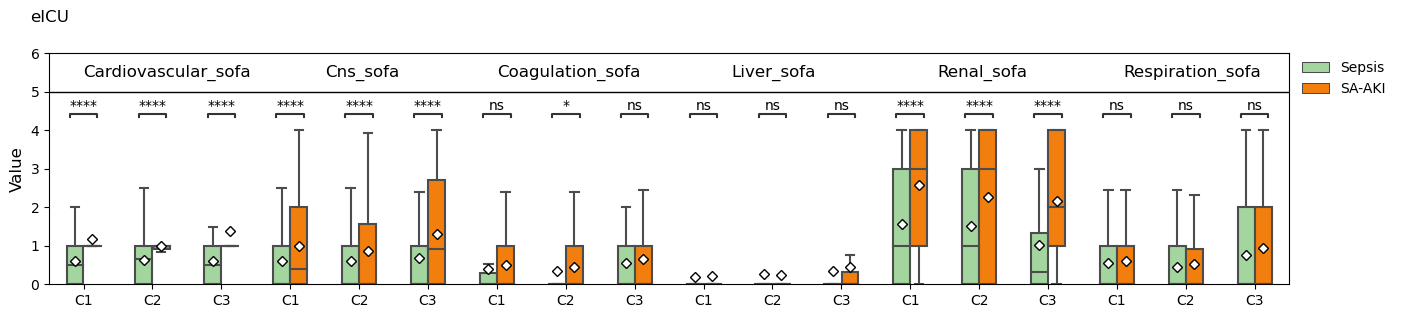

In [26]:
def fea_boxplot3(df_start,df_end,tit,select_lst):
    import seaborn as sns
    from statannot import add_stat_annotation
    from statannotations.Annotator import Annotator
    df_start["status"] = "Sepsis"
    df_end["status"] = "SA-AKI"
    data_p = pd.concat([df_start, df_end], axis=0)
    data_p = data_p[data_p["sub_sofa"].isin(select_lst)]
    data_p = data_p.sort_values(["sub_sofa","groupHPD"])
    tit_lst = data_p.label.unique().tolist()
    print(tit_lst)
    box_pairs = []
    for i in tit_lst:#['cardiovascular_sofa_1', 'cardiovascular_sofa_2', 'cardiovascular_sofa_3', 'cns_sofa_1', 'cns_sofa_2', 'cns_sofa_3', 'coagulation_sofa_1', 'coagulation_sofa_2', 'coagulation_sofa_3', 'liver_sofa_1', 'liver_sofa_2', 'liver_sofa_3', 'renal_sofa_1', 'renal_sofa_2', 'renal_sofa_3', 'respiration_sofa_1', 'respiration_sofa_2', 'respiration_sofa_3']:
        j = ((i, "Sepsis"), (i, "SA-AKI"))
        box_pairs.append(j)
    size=12
    map_dict ={1:"C1",2:"C2",3:"C3"}
    data_p["groupHPD"] = data_p["groupHPD"].map(map_dict)
    fig = plt.figure(figsize=(16,3))
    ax = sns.boxplot(x="label",y="value",hue="status",
                    showfliers=False,showmeans=True,meanprops = {'markersize':5,'marker':'D', 'markerfacecolor':'white','markeredgecolor':'black'},
                    data=data_p,palette=["#a1d99b","#ff7f00"],saturation=0.9,width=0.5) #order=["C1","C2","C3"]
    
    add_stat_annotation(ax,data=data_p,x="label",y="value",hue="status",order=tit_lst,test="t-test_welch",box_pairs=box_pairs,loc='outside')
    plt.legend(bbox_to_anchor=(1,1.02),frameon=False) #Mann-Whitney
    plt.title(tit,x=0,y=1.1)
#    plt.xticks([x for x in range(1, len(select_lst) * 4) if x % 4 != 0],["C1","C2","C3"]*len(select_lst))
    plt.xticks(list(range(0,len(select_lst)*3)),["C1","C2","C3"]*len(select_lst))
#    plt.xticks(rotation=90) #list(range(1,len(select_lst)*3+1)),  [x for x in range(1, len(select_lst)*4) if x % 4 != 0],
    plt.ylim(0,6)
    plt.ylabel("Value",fontsize=size)
    plt.xlabel("")
    plt.axhline(y=5, color='black', linestyle='-',lw=1)
    
    tit_lst = data_p.sub_sofa.unique().tolist()
    tit_lst = [word.capitalize() for word in tit_lst]

    plt.text(0,5.4,tit_lst[0],fontsize=size)
    plt.text(3.5,5.4,tit_lst[1],fontsize=size)
    plt.text(6,5.4,tit_lst[2],fontsize=size)
    plt.text(9.4,5.4,tit_lst[3],fontsize=size)
    plt.text(12.4,5.4,tit_lst[4],fontsize=size)
    plt.text(15.1,5.4,tit_lst[5],fontsize=size)
    plt.show()
    
fea_boxplot3(df_start_,df_end_,"eICU",sub_sofa_lst)

['sofa_1', 'sofa_2', 'sofa_3', 'sofa_norenal_1', 'sofa_norenal_2', 'sofa_norenal_3']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sofa_2_Sepsis v.s. sofa_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.096e-41 stat=-1.403e+01
sofa_1_Sepsis v.s. sofa_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.597e-42 stat=-1.442e+01
sofa_3_Sepsis v.s. sofa_3_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=1.336e-15 stat=-8.730e+00
sofa_norenal_1_Sepsis v.s. sofa_norenal_1_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=7.340e-18 stat=-8.972e+00
sofa_norenal_2_Sepsis v.s. sofa_norenal_2_SA-AKI: Welch's t-test independent samples with Bonferroni correction, P_val=3.610e-17 stat=-8.724e+00
sofa_norenal_3_Sepsis v.s. sofa_norenal_3_SA-AKI: Welch's t-test independe

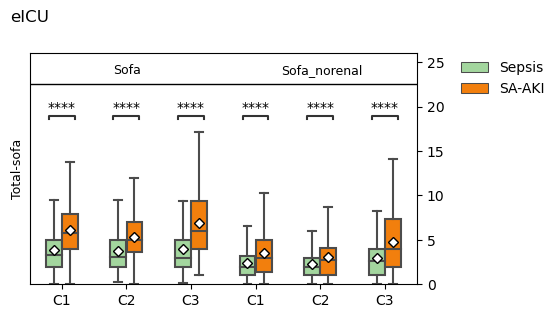

In [27]:
def fea_boxplot3(df_start,df_end,tit,select_lst):
    import seaborn as sns
    from statannot import add_stat_annotation
    from statannotations.Annotator import Annotator
    df_start["status"] = "Sepsis"
    df_end["status"] = "SA-AKI"
    data_p = pd.concat([df_start, df_end], axis=0)
    data_p = data_p[data_p["sub_sofa"].isin(select_lst)]
    data_p = data_p.sort_values(["sub_sofa","groupHPD"])
    tit_lst = data_p.label.unique().tolist()
    print(tit_lst)
    box_pairs = []
    for i in tit_lst:
        j = ((i, "Sepsis"), (i, "SA-AKI"))
        box_pairs.append(j)
    size=9
    map_dict ={1:"C1",2:"C2",3:"C3"}
    data_p["groupHPD"] = data_p["groupHPD"].map(map_dict)
    fig = plt.figure(figsize=(5,3))
    ax = sns.boxplot(x="label",y="value",hue="status",
                    showfliers=False,showmeans=True,meanprops = {'markersize':5,'marker':'D', 'markerfacecolor':'white','markeredgecolor':'black'},
                    data=data_p,palette=["#a1d99b","#ff7f00"],saturation=0.9,width=0.5) #order=["C1","C2","C3"]
    ax.yaxis.tick_right()
    add_stat_annotation(ax,data=data_p,x="label",y="value",hue="status",order=tit_lst,test="t-test_welch",box_pairs=box_pairs,loc='outside')
    plt.legend(bbox_to_anchor=(1.08,1.02),frameon=False) #Mann-Whitney
    plt.title(tit,x=0,y=1.1)
    plt.xticks(list(range(0,len(select_lst)*3)),["C1","C2","C3"]*len(select_lst))
    plt.ylim(0,26)
    plt.ylabel("")
    plt.xlabel("")
    plt.ylabel("Total-sofa",fontsize=size)
    plt.axhline(y=22.5, color='black', linestyle='-',lw=1)
    
    tit_lst = data_p.sub_sofa.unique().tolist()
    tit_lst = [word.capitalize() for word in tit_lst]
    plt.text(0.8,23.7,tit_lst[0],fontsize=size)
    plt.text(3.4,23.7,tit_lst[1],fontsize=size)
    plt.show()
    
fea_boxplot3(df_start_,df_end_,"eICU",total_sofa_lst)